# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.19 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [9]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [10]:
# get the default brain
brain_name = env.brain_names[0]
brain      = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [11]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [12]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action     = np.random.randint(action_size)        # select an action
    env_info   = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done   = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state  = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [23]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [1]:
'''
Note to the reviewer 23-Jun-21

This project used a double deep-Q network modifying the code provided in the lessons.
Alterations to the code were in the double_dqn, the agent, and the class as per the files
submitted.  I used Batch Normaliztion to accelerates learning on layers one and two, altered 
the fcx_unit sizes which did very little to improve performance so I stuck with 64 as the size for
fc1 and fc2.  The execution was run in 'CPU' mode.

The final saved trained model used a three layer neural network where the batchsize was 32.
Hyper-parameters: 
   (1) LR-learning-rate:        LR          = 5e-55 
   (2) Espsilon-Decay:          eps_decay   = 0.9645
   (3) Gamma:                   GAMMA       = 0.95
   (4) Batch size:              BATCH_SIZE  = 32
Agent Parameters:
   (1) state size:              state_size  = 37
   (2) Env actions:             action_size = 4
   (3) Seed:                    seed        = 42            
scores      = 0   

These parameters realized the best results.Note: Dropping Gamma to around 0.95 helped realize the results
faster, but not as much as adjusting Espsilon-Decay, i.e., slowing it and LR, i.e., speeding it up.

Within this notebook you will also see runs using a four layer neural net altering the 
hyper-parameters. Results were roughly the same so I chose the final three layer model as described above resulting in
the following output:

   BATCH_SIZE 32
   Episode 100	Average Score: 2.33
   Episode 200	Average Score: 7.11
   Episode 300	Average Score: 9.86
   Episode 393	Average Score: 13.07
   Environment solved in 293 episodes!	Average Score: 13.07

Thank you.
Kim

'''

'\nNote to the reviewer 18-Jun-21\nThis project used a double deep-Q network modifying the code provided in the lessons.\nAlterations to the code were in the double_dqn, the agent, and the class as per the files\nsubmitted.  I used Batch Normaliztion to accelerates learning on layers one and two, altered \nthe fcx_unit sizes which did very little to improve performance so I stuck with 64 as the size for\nfc1 and fc2.\n\nThe final saved trained model used a three layer neural network where the batchsize was 32.\nHyper-parameters: \n   (1) LR-learning-rate:        LR          = 5e-55 \n   (2) Espsilon-Decay:          eps_decay   = 0.9645\n   (3) Gamma:                   GAMMA       = 0.95\n   (4) Batch size:              BATCH_SIZE  = 32\nAgent Parameters:\n   (1) state size:              state_size  = 37\n   (2) Env actions:             action_size = 4\n   (3) Seed:                    seed        = 42            \nscores      = 0   \nThese parameters realized the best results.Note: Drop

In [2]:
#
#. Import the Necessary Packages
#
#
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

!python -m pip install pyvirtualdisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

In [5]:
print(torch.__version__)

0.4.0


In [7]:
#
#  Re the Environment and Agent
#
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 0.          0.          1.          0.          0.16101955  1.          0.
  0.          0.          0.04571758  1.          0.          0.          0.
  0.2937662   0.          0.          1.          0.          0.14386636
  0.          0.          1.          0.          0.16776823  1.          0.
  0.          0.          0.04420976  1.          0.          0.          0.
  0.05423063  0.          0.        ]
States have length: 37


In [14]:
#
#  Establish path to files
#
import os
dir = os.getcwd()
print(dir)

from pathlib import Path  #/home/workspace/ etc
print(*Path(dir).iterdir(), sep="\n") # print files in the directory
#
# set the trained file name
#
file_name = dir + '/trained_model.pt'
file_name

/home/workspace
/home/workspace/dqn_agent_prj1.py
/home/workspace/model_prj1.py
/home/workspace/python
/home/workspace/__pycache__
/home/workspace/unity-environment.log
/home/workspace/checkpoint.pth
/home/workspace/.ipynb_checkpoints
/home/workspace/Navigation.ipynb


'/home/workspace/trained_model.pt'

In [15]:
def get_ns_rewrd_done(env_info):
    next_state = env_info.vector_observations[0]   # get the next state
    reward     = env_info.rewards[0]               # get the reward
    done       =  env_info.local_done[0]           # get done-status
    return next_state, reward, done


In [16]:
#nxt,rr,dd = get_ns_rewrd_done(env_info)
nxt,_,_ = get_ns_rewrd_done(env_info)
print(nxt,len(nxt))
#print(rr)
#print(dd)

[ 1.          0.          0.          0.          0.43962687  1.          0.
  0.          0.          0.19398789  1.          0.          0.          0.
  0.48112735  0.          0.          1.          0.          0.52109712
  0.          0.          1.          0.          0.38285938  1.          0.
  0.          0.          0.10405888  1.          0.          0.          0.
  0.37148571  0.          0.        ] 37


In [17]:
from dqn_agent_prj1 import Agent
agent = Agent(state_size=37, action_size=4, seed=42)

In [18]:
def double_dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores        = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps           = eps_start                    # initialize epsilon
    
    for i_episode in range(1, n_episodes+1):
        #state = env.reset()
        env_info  = env.reset(train_mode=True)[brain_name] # reset the environment
        state,_,_ = get_ns_rewrd_done(env_info)            # get the current state
        score     = 0
        
        for t in range(max_t):
            action   = agent.act(state, eps)         # Get action(s) for current state
            env_info = env.step(action)[brain_name]  # Take action w/in the environment at current state
            next_state, reward, done = get_ns_rewrd_done(env_info) # get next state & rewards
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            #torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            torch.save(agent.qnetwork_local.state_dict(), file_name)
            break
    return scores


In [4]:
#
#  Set directory for saving model
#

Episode 100	Average Score: 2.57
Episode 200	Average Score: 7.95
Episode 300	Average Score: 11.82
Episode 400	Average Score: 14.28
Episode 500	Average Score: 16.38


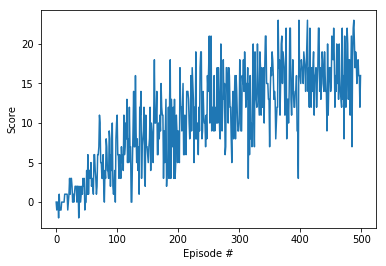

In [11]:
#***KEEP***
# New 4-layer model 10-Jun-2021 
#
BATCH_SIZE  = 64
LR          = 5e-55 
GAMMA       = 0.95
agent       = Agent(state_size=37, action_size=4, seed=42)
scores      = 0
scores = dqn(n_episodes=500, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.9865)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 2.55
Episode 200	Average Score: 8.72
Episode 300	Average Score: 11.83
Episode 400	Average Score: 15.03
Episode 500	Average Score: 16.55


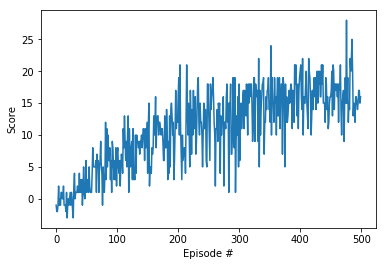

In [21]:
#***KEEP
# New 4-layer model 10-Jun-2021 3:10pm
#
#  esp decay =0.9845;  GAMMA 0.05; batchsize =32
#
BATCH_SIZE  = 32
LR          = 5e-55 
GAMMA       = 0.95
agent       = Agent(state_size=37, action_size=4, seed=42)
scores      = 0
scores = dqn(n_episodes=500, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.9845)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

BATCH_SIZE 32
Episode 100	Average Score: 2.33
Episode 200	Average Score: 7.11
Episode 300	Average Score: 9.86
Episode 393	Average Score: 13.07
Environment solved in 293 episodes!	Average Score: 13.07


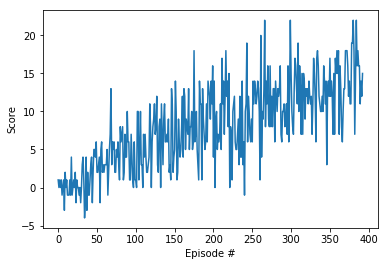

In [22]:
#***BEST RUN ***
# 13-Jun-2021 3-layer model 9:20 AM
#
#  esp decay =0.9645;  GAMMA 0.95; batchsize =32
#
BATCH_SIZE  = 32
LR          = 5e-55 
GAMMA       = 0.95
agent       = Agent(state_size=37, action_size=4, seed=42)
scores      = 0
print('BATCH_SIZE',BATCH_SIZE )
scores = double_dqn(n_episodes=700, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.9645)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

BATCH_SIZE 64
Episode 100	Average Score: 0.38
Episode 200	Average Score: 5.22
Episode 300	Average Score: 9.63
Episode 400	Average Score: 12.16
Episode 474	Average Score: 13.03
Environment solved in 374 episodes!	Average Score: 13.03


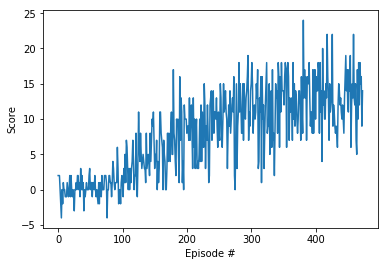

In [13]:
#
# 13-Jun-2021 3-layer model 9:20 AM
#
#  esp decay =0.9845;  GAMMA 0.05; batchsize =32
#
#
BATCH_SIZE  = 64
LR          = 5e-55 
GAMMA       = 0.95
agent       = Agent(state_size=37, action_size=4, seed=42)
scores      = 0
print('BATCH_SIZE',BATCH_SIZE )
scores = double_dqn(n_episodes=700, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.9645)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [25]:
env.close()

In [24]:
#
# check that model is saved 
#
print(*Path(dir).iterdir(), sep="\n")#"/home/workspace/dog_project/images/"

/home/workspace/dqn_agent_prj1.py
/home/workspace/model_prj1.py
/home/workspace/python
/home/workspace/__pycache__
/home/workspace/unity-environment.log
/home/workspace/checkpoint.pth
/home/workspace/.ipynb_checkpoints
/home/workspace/Navigation.ipynb
/home/workspace/trained_model.pt


In [3]:
#
#    Improving Performance
#
'''
To improve performance I would change the architecture back to a 4-layer neural network and apply
Batch Normaliztion to accelerates learning on just two layers one and three; see the tow example
results using a four-layer network. I would  altered the fc3_unit size to 32 versus 64 and 
reapply these same hyperparameters: 
   BATCH_SIZE  = 32 # 
   LR          = 5e-65  # Speed up learning a little more 
   GAMMA       = 0.95
   agent       = Agent(state_size=37, action_size=4, seed=42)
I would also try the memory prioritization algotithm to determine if there is an increase in goal
attainment.
'''

'\nTo improve performance I would change the architecture back to a 4-layer neural network and apply\nBatch Normaliztion to accelerates learning on just two layers one and three; see the tow example\nresults using a four-layer network. I would  altered the fc3_unit size to 32 versus 64 and \nreapply these same hyperparameters: \n   BATCH_SIZE  = 32 # \n   LR          = 5e-65  # Speed up learning a little more \n   GAMMA       = 0.95\n   agent       = Agent(state_size=37, action_size=4, seed=42)\nI would also try the memory prioritization algotithm to determine if there is an increase in goal\nattainment.\n'